In [1]:
import tensorflow as tf 
import os 
import cv2
import matplotlib.pyplot as mp
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Rescaling

Found 1461 files belonging to 3 classes.
Found 490 files belonging to 3 classes.
Epoch 1/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.7776 - loss: 0.4912 - val_accuracy: 1.0000 - val_loss: 8.8250e-05
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 1.0000 - loss: 1.5887e-05 - val_accuracy: 1.0000 - val_loss: 1.2956e-05
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 1.0000 - loss: 2.1555e-06 - val_accuracy: 1.0000 - val_loss: 8.1603e-06
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 1.0000 - loss: 1.3579e-06 - val_accuracy: 1.0000 - val_loss: 7.2797e-06
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 1.0000 - loss: 1.1559e-06 - val_accuracy: 1.0000 - val_loss: 5.2898e-06
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 1.0000 - loss: 7.8001e-07 - val_accuracy: 1.0000 - val_loss: 3.6606e-06
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 1.0000 - loss: 5.3593e-07 - val_accuracy: 1.0000 -

<Figure size 640x480 with 0 Axes>

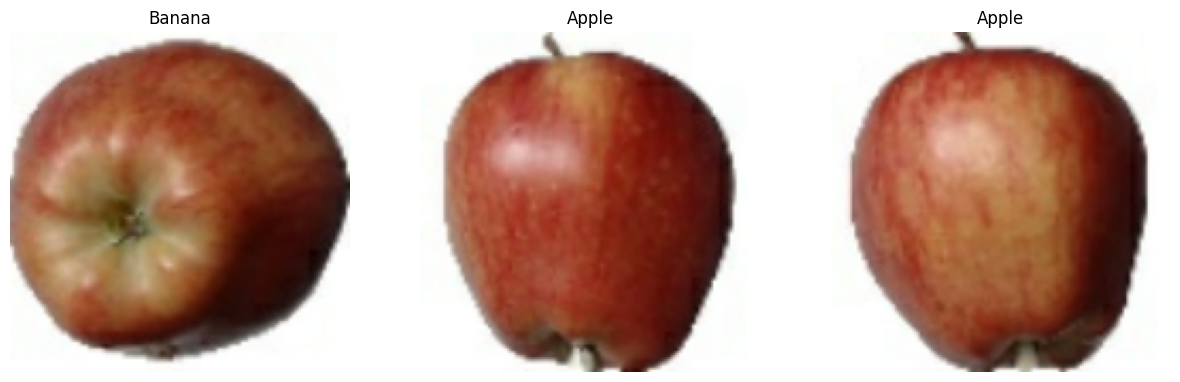

In [22]:
dataset_pas = os.path.join(os.getcwd(),r"C:\Users\USER\OneDrive\Desktop\fruit_images") # importa a pasta com todos os arquivos 
dataset_trei_path = os.path.join(dataset_pas, "train") # importa uma subpasta com arquivos de treino
dataset_val = os.path.join(dataset_pas, "test") # importa uma subpasta com arquivos para validação 

data_aple_t = len(os.listdir(os.path.join(dataset_trei_path, "Apple")))  
data_Banana_t = len(os.listdir(os.path.join(dataset_trei_path, "Banana")))
data_Orange_t = len(os.listdir(os.path.join(dataset_trei_path, "Orange"))) 


data_aple_test = len(os.listdir(os.path.join(dataset_val, "Apple"))) 
data_Banana_test = len(os.listdir(os.path.join(dataset_val, "Banana"))) 
data_Orange_test = len(os.listdir(os.path.join(dataset_val, "Orange"))) 

imagem_width = 160
imagem_height = 160
imagem_color_channel = 3 # rgb
imagem_color_channel_size = 255
imagem_size = (imagem_width, imagem_height)
imagem_shape = (imagem_width, imagem_height, imagem_color_channel) # define como as imagens vão se comportar 


class_names = ['Apple', 'Banana', 'Orange'] # uma array para nomear as classes

dataset_treino = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_trei_path,
    image_size = imagem_size,
    shuffle = True

) # retorna um dataset baseado na pasta que foi usada como argumento 


dataset_validacao = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_val,
    image_size = imagem_size,
    shuffle = True
)# retorna um dataset baseado na pasta que foi usada como argumento 

dataset_val_pt = tf.data.experimental.cardinality(dataset_validacao)
dataset_val_b = dataset_val_pt//5 
dataset_teste = dataset_validacao.take(dataset_val_b)
dataset_validacao = dataset_validacao.skip(dataset_val_b)# pega uma parte das imagens do dataset de validação e usa para ensinar o modelo 


modelo = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./imagem_color_channel_size, input_shape=imagem_shape),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Mudando para softmax (3 saídas)
])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # Correção aqui!
    metrics=['accuracy']
)

I = modelo.fit(dataset_treino, validation_data=dataset_validacao, epochs=15)  

def plot_dt_prev (dataset): 
    features, labels = dataset.as_numpy_iterator().next()
    previ = modelo.predict_on_batch(features).flatten()
    previ = tf.where(previ < 0.5,0, 1)

    mp.gcf().clear()
    mp.figure(figsize= (15,15))

    for i in range(3):
         mp.subplot(3,3, i+1)
         mp.axis('off')
         mp.imshow(features[i].astype('uint8'))
         mp.title(class_names[previ[i]])


plot_dt_prev(dataset_validacao)